<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px">

*بخش مجموعه داده:*
---

## پاسخ الف:

---


## Part A: Loading the Dataset

The dataset Conll2003 is widely used for Named Entity Recognition (NER). It includes sentences from news articles, annotated with tokenized words, Part-Of-Speech (POS) tags, Chunk tags, and NER tags.

The dataset contains the following columns:

1. **tokens:** The tokenized words in the sentence.
2. **pos_tags:** Part-of-Speech tags for each token (e.g., NN for noun).
3. **chunk_tags:** Chunking tags for syntactic structure (e.g., B-NP, I-VP).
    - **NP (Noun Phrase):** A group of words formed around a noun.  
    - **VP (Verb Phrase):** A group of words formed around a verb.  
    - **PP (Prepositional Phrase):** Phrases that start with prepositions.  
4. **ner_tags:** Named Entity Recognition labels (e.g., B-PER for a person's name).

---

<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px">

## پاسخ ب:

---


## Part B: Examine Tags

1. POS Tags: Indicate the grammatical role of each token (e.g., noun, verb).
2. Chunk Tags: Define the syntactic chunk (e.g., noun phrase, verb phrase).
3. NER Tags: Mark entities such as people, locations, and organizations.

---

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset

# Load the CoNLL2003 dataset
dataset = load_dataset("eriktks/conll2003")

# Display the dataset structure
print("Dataset Features:")
print(dataset)

# Display the first example for inspection
print("\nSample Data:")
print(dataset['train'][0])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Dataset Features:
DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})

Sample Data:
{'id': '0', 'tokens': ['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.'], 'pos_tags': [22, 42, 16, 21, 35, 37, 16, 21, 7], 'chunk_tags': [11, 21, 11, 12, 21, 22, 11, 12, 0], 'ner_tags': [3, 0, 7, 0, 0, 0, 7, 0, 0]}


In [ ]:
# Check the features of the dataset
print("\nFeatures in the dataset:")
print(dataset['train'].features)

# Examine tags other than NER
print("\nTag Categories in the Dataset:")
if 'ner_tags' in dataset['train'].features:
    print("NER Tags:", dataset['train'].features['ner_tags'].feature.names)

# Check if there are other tag columns
columns = dataset['train'].column_names
print("\nOther Tags:")
for column in columns:
    if column not in ['ner_tags', 'tokens', 'id']:
        print(f"Additional Tag Column: {column}")
        print(dataset['train'][column][0:5])  # Show a sample



Features in the dataset:
{'id': Value(dtype='string', id=None), 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None), 'pos_tags': Sequence(feature=ClassLabel(names=['"', "''", '#', '$', '(', ')', ',', '.', ':', '``', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'NN|SYM', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB'], id=None), length=-1, id=None), 'chunk_tags': Sequence(feature=ClassLabel(names=['O', 'B-ADJP', 'I-ADJP', 'B-ADVP', 'I-ADVP', 'B-CONJP', 'I-CONJP', 'B-INTJ', 'I-INTJ', 'B-LST', 'I-LST', 'B-NP', 'I-NP', 'B-PP', 'I-PP', 'B-PRT', 'I-PRT', 'B-SBAR', 'I-SBAR', 'B-UCP', 'I-UCP', 'B-VP', 'I-VP'], id=None), length=-1, id=None), 'ner_tags': Sequence(feature=ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], id=None), length=-1, id=None)}

Tag Categories in the Datas

<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px">

## پاسخ ج و د:

---


## Part C: Constructing the `vocab` Class

Implement a class for vocabulary management, including methods for token-to-ID mapping, ID-to-token mapping, displaying vocabulary size, and handling a cutoff threshold.

\
To build a vocabulary class:

    1. Map tokens to unique IDs.
    2. Add special tokens: <pad>, <unk>, <s>, </s>.
    3. Ignore tokens with a frequency less than cutoff=5.
\

### Expected Outputs

**Vocabulary Size:** The total number of tokens in the vocabulary after applying the cutoff.

**ID of 'quick':** The assigned ID for the token "quick".

**Token for ID 0:** The token corresponding to ID 0, which is usually `<pad>` or the first special token added.

---

In [ ]:
from collections import Counter
from typing import List

class Vocab:
    def __init__(self, cutoff: int = 5):
        self.token_to_id = {}
        self.id_to_token = {}
        self.cutoff = cutoff

    def build_vocab(self, dataset, special_tokens: List[str] = None):
        # Flatten the tokens from the dataset
        all_tokens = [token for example in dataset['tokens'] for token in example]

        # Count token frequencies
        token_counts = Counter(all_tokens)

        # Add special tokens
        if special_tokens:
            for token in special_tokens:
                self.token_to_id[token] = len(self.token_to_id)

        # Add tokens with frequency >= cutoff
        for token, count in token_counts.items():
            if count >= self.cutoff and token not in self.token_to_id:
                self.token_to_id[token] = len(self.token_to_id)

        # Create ID-to-token mapping
        self.id_to_token = {id_: token for token, id_ in self.token_to_id.items()}

    def token_to_id_mapping(self, token):
        # Return ID of the token or <unk> if token not found
        return self.token_to_id.get(token, self.token_to_id.get('<unk>'))

    def id_to_token_mapping(self, id_):
        # Return token for the given ID or <unk> if ID not found
        return self.id_to_token.get(id_, '<unk>')

    def size(self):
        # Return the size of the vocabulary
        return len(self.token_to_id)

# Build and display the vocabulary
vocab = Vocab(cutoff=5)
vocab.build_vocab(dataset['train'], special_tokens=["<pad>", "<unk>", "<s>", "</s>"])

# Display the vocabulary size
print("\nVocabulary Size:", vocab.size())

# Check the token ID of 'quick'
print("ID for token 'quick':", vocab.token_to_id_mapping('quick'))

# Check the token with ID 0
print("Token with ID 0:", vocab.id_to_token_mapping(0))



Vocabulary Size: 4917
ID for token 'quick': 2387
Token with ID 0: <pad>


<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px">

*بخش اول:*

---

## پاسح الف و ب:

---





### Explanation

*Collate Function:*

    Pads all sequences in a batch to the same length using pad_sequence.
    Creates attention masks to distinguish between real tokens and padding tokens.
    Returns padded tokens, tags, and attention masks.

*DataLoader:*

    Automatically batches data and uses the custom collate_fn for preprocessing.
    Shuffles the training data while keeping validation data fixed.

*Output Shapes:*

    Tokens: Shape is (batch_size, max_sequence_length) after padding.
    Tags: Same shape as tokens, with padding for tags set to -1.
    Attention Masks: Binary tensor of the same shape, where 1 indicates a real token, and 0 indicates padding.


---

Using collate_fn to pad sentences to the maximum length within each batch, rather than padding all sentences to the length of the longest sentence in the dataset, offers the following advantages:

* Memory Efficiency: By padding sentences only to the maximum length within each batch, the data size is reduced, leading to more efficient memory usage.

* Reduced Processing Time: Shorter sentences take less time to process, which increases the overall efficiency of the model.

* Improved Model Performance: Padding sentences to the length of the longest sentence in the dataset can add many <pad> tokens, potentially introducing noise and reducing the quality of model training. Using collate_fn mitigates this issue, resulting in better model training.

---

In [ ]:
from datasets import load_dataset
from torch.utils.data import DataLoader
import torch
import torch.nn as nn

# Load the dataset
dataset = load_dataset("eriktks/conll2003")

# Split into train and validation sets
train_data = dataset['train']
validation_data = dataset['validation']

# Display the first example from the train dataset
print("Sample from Train Dataset:")
print(train_data[0])


Sample from Train Dataset:
{'id': '0', 'tokens': ['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.'], 'pos_tags': [22, 42, 16, 21, 35, 37, 16, 21, 7], 'chunk_tags': [11, 21, 11, 12, 21, 22, 11, 12, 0], 'ner_tags': [3, 0, 7, 0, 0, 0, 7, 0, 0]}


### Collate Function for Padding

In [ ]:
def pad_sequence(sequence, max_len, pad_token_id):
    return sequence + [pad_token_id] * (max_len - len(sequence))

def collate_fn(batch):
    """
    Custom collate function to pad sentences and create input-output pairs.
    """
    tokens = [item['tokens'] for item in batch]
    tags = [item['ner_tags'] for item in batch]

    token_ids = [[vocab.token_to_id_mapping(token) for token in token_list] for token_list in tokens]
    max_len = max(len(token_id) for token_id in token_ids)
    pad_token_id = vocab.token_to_id_mapping('<pad>')

    # Pad sequences to the same length
    padded_tokens = torch.tensor([pad_sequence(token_id, max_len, pad_token_id) for token_id in token_ids])
    padded_tags = torch.tensor([pad_sequence(tag_list, max_len, 9) for tag_list in tags])

    # Create attention masks (1 for real tokens, 0 for padding)
    attention_masks = (padded_tokens != pad_token_id).long()

    return padded_tokens, padded_tags, attention_masks



In [ ]:
# print(vocab.token_to_id_mapping('<pad>'))

### DataLoaders

In [ ]:
# Create DataLoaders
batch_size = 32

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, collate_fn=collate_fn, num_workers=4)
validation_loader = DataLoader(validation_data, batch_size=batch_size, shuffle=False, collate_fn=collate_fn, num_workers=4)

# Display the shape of the first batch
train_batch = next(iter(train_loader))
val_batch = next(iter(validation_loader))

print("Train Batch Shapes:")
print("Tokens:", train_batch[0].shape)
print("Tags:", train_batch[1].shape)
print("Attention Masks:", train_batch[2].shape)

print("\nValidation Batch Shapes:")
print("Tokens:", val_batch[0].shape)
print("Tags:", val_batch[1].shape)
print("Attention Masks:", val_batch[2].shape)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Train Batch Shapes:
Tokens: torch.Size([32, 41])
Tags: torch.Size([32, 41])
Attention Masks: torch.Size([32, 41])

Validation Batch Shapes:
Tokens: torch.Size([32, 41])
Tags: torch.Size([32, 41])
Attention Masks: torch.Size([32, 41])


<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px">

## *بخش دوم:*

---

(الف) تا (ج)

---


## الف

In [ ]:
class RNNCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(RNNCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Parameters for the RNN cell
        self.W_xh = nn.Linear(input_size, hidden_size)
        self.W_hh = nn.Linear(hidden_size, hidden_size)

    def forward(self, x, hidden):
        """
        x: (batch_size, input_size)
        hidden: (batch_size, hidden_size)
        """
        h_next = torch.tanh(self.W_xh(x) + self.W_hh(hidden))
        return h_next


class BiRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(BiRNN, self).__init__()
        self.hidden_size = hidden_size

        # Forward and backward RNN cells
        self.forward_rnn = RNNCell(input_size, hidden_size)
        self.backward_rnn = RNNCell(input_size, hidden_size)


    def forward(self, x):
        """
        x: (batch_size, seq_len, input_size)
        """
        batch_size, seq_len, _ = x.size()

        # Initialize hidden states for forward and backward RNNs
        h_forward = torch.zeros(batch_size, self.hidden_size, device=x.device)
        h_backward = torch.zeros(batch_size, self.hidden_size, device=x.device)

        # Forward pass
        forward_outputs = []
        for t in range(seq_len):
            h_forward = self.forward_rnn(x[:, t, :], h_forward)
            forward_outputs.append(h_forward)

        # Backward pass
        backward_outputs = []
        for t in reversed(range(seq_len)):
            h_backward = self.backward_rnn(x[:, t, :], h_backward)
            backward_outputs.append(h_backward)

        # Reverse backward outputs to match forward outputs
        backward_outputs.reverse()

        # Concatenate forward and backward hidden states
        forward_outputs = torch.stack(forward_outputs, dim=1)  # (batch_size, seq_len, hidden_size)
        backward_outputs = torch.stack(backward_outputs, dim=1)  # (batch_size, seq_len, hidden_size)
        outputs = torch.cat([forward_outputs, backward_outputs], dim=2)  # (batch_size, seq_len, hidden_size*2)

        return outputs


## ب

In [ ]:
class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Input gate weights
        self.W_i = nn.Linear(input_size + hidden_size, hidden_size)
        # Forget gate weights
        self.W_f = nn.Linear(input_size + hidden_size, hidden_size)
        # Output gate weights
        self.W_o = nn.Linear(input_size + hidden_size, hidden_size)
        # Candidate cell state weights
        self.W_c = nn.Linear(input_size + hidden_size, hidden_size)

    def forward(self, x, hidden):
        h_prev, c_prev = hidden
        combined = torch.cat((x, h_prev), dim=1)

        # Gates and candidate cell state
        i = torch.sigmoid(self.W_i(combined))  # Input gate
        f = torch.sigmoid(self.W_f(combined))  # Forget gate
        o = torch.sigmoid(self.W_o(combined))  # Output gate
        c_tilde = torch.tanh(self.W_c(combined))  # Candidate cell state

        # Cell state and hidden state updates
        c_next = f * c_prev + i * c_tilde
        h_next = o * torch.tanh(c_next)

        return h_next, c_next


class BiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(BiLSTM, self).__init__()
        self.hidden_size = hidden_size

        # Forward and backward LSTM cells
        self.forward_lstm = LSTMCell(input_size, hidden_size)
        self.backward_lstm = LSTMCell(input_size, hidden_size)

    def forward(self, x):
        batch_size, seq_len, _ = x.size()

        # Initialize hidden states and cell states
        h_forward = torch.zeros(batch_size, self.hidden_size, device=x.device)
        c_forward = torch.zeros(batch_size, self.hidden_size, device=x.device)

        h_backward = torch.zeros(batch_size, self.hidden_size, device=x.device)
        c_backward = torch.zeros(batch_size, self.hidden_size, device=x.device)

        # Forward LSTM pass
        forward_outputs = []
        for t in range(seq_len):
            h_forward, c_forward = self.forward_lstm(x[:, t, :], (h_forward, c_forward))
            forward_outputs.append(h_forward)

        # Backward LSTM pass
        backward_outputs = []
        for t in reversed(range(seq_len)):
            h_backward, c_backward = self.backward_lstm(x[:, t, :], (h_backward, c_backward))
            backward_outputs.append(h_backward)

        # Reverse backward outputs to align with forward outputs
        backward_outputs.reverse()

        # Concatenate forward and backward outputs
        forward_outputs = torch.stack(forward_outputs, dim=1)  # (batch_size, seq_len, hidden_size)
        backward_outputs = torch.stack(backward_outputs, dim=1)  # (batch_size, seq_len, hidden_size)
        outputs = torch.cat([forward_outputs, backward_outputs], dim=2)  # (batch_size, seq_len, hidden_size * 2)

        return outputs


## ج

In [ ]:
import torch.optim as optim
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

class GRUCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(GRUCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Update gate weights
        self.W_z = nn.Linear(input_size + hidden_size, hidden_size)
        # Reset gate weights
        self.W_r = nn.Linear(input_size + hidden_size, hidden_size)
        # Candidate hidden state weights
        self.W_h = nn.Linear(input_size + hidden_size, hidden_size)

    def forward(self, x, hidden):
        combined = torch.cat((x, hidden), dim=1)

        z = torch.sigmoid(self.W_z(combined))  # Update gate
        r = torch.sigmoid(self.W_r(combined))  # Reset gate
        h_tilde = torch.tanh(self.W_h(torch.cat((x, r * hidden), dim=1)))  # Candidate hidden state

        h_next = (1 - z) * hidden + z * h_tilde

        return h_next


class BiGRU(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(BiGRU, self).__init__()
        self.hidden_size = hidden_size

        # Forward and backward GRU cells
        self.forward_gru = GRUCell(input_size, hidden_size)
        self.backward_gru = GRUCell(input_size, hidden_size)


    def forward(self, x):
        # Input shape: (batch_size, seq_len, input_size)
        batch_size, seq_len, _ = x.size()

        # Initialize hidden states for forward and backward GRUs
        h_forward = torch.zeros(batch_size, self.hidden_size, device=x.device)
        h_backward = torch.zeros(batch_size, self.hidden_size, device=x.device)

        # Forward GRU pass
        forward_outputs = []
        for t in range(seq_len):
            h_forward = self.forward_gru(x[:, t, :], h_forward)
            forward_outputs.append(h_forward)

        # Backward GRU pass
        backward_outputs = []
        for t in reversed(range(seq_len)):
            h_backward = self.backward_gru(x[:, t, :], h_backward)
            backward_outputs.append(h_backward)

        # Reverse backward outputs to align with forward outputs
        backward_outputs.reverse()

        # Concatenate forward and backward outputs
        outputs = torch.cat([torch.stack(forward_outputs, dim=1), torch.stack(backward_outputs, dim=1)], dim=2)

        # # Compute logits using fully connected layer
        # logits = self.fc(outputs)  # (batch_size, seq_len, output_size)

        return outputs


In [ ]:
class NERModel(nn.Module):
    def __init__(self, model, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(NERModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)  # padding_idx = 0 (ID <pad>)
        self.model = model
        self.fc = nn.Linear(hidden_dim * 2, output_dim)


    def forward(self, x):
        embedded = self.embedding(x)
        model_out = self.model(embedded)
        output = self.fc(model_out)
        return output


In [ ]:
embedding_size = 64
hidden_size = 64
num_epochs = 10
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

output_dim = len(set([tag for tags in dataset['train']['ner_tags'] for tag in tags]))
ner_tag_names = {
    0: "O",
    1: "B-PER",
    2: "I-PER",
    3: "B-ORG",
    4: "I-ORG",
    5: "B-LOC",
    6: "I-LOC",
    7: "B-MISC",
    8: "I-MISC"
}
vocab_size = vocab.size()

print(f"Number of output classes: {output_dim}")


Number of output classes: 9


## نتایج

In [ ]:
from tqdm import tqdm


def train_and_evaluate(model):

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    criterion = nn.CrossEntropyLoss(ignore_index=9)  # ignore_index = 0 (ID <pad>)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


    # Move model and criterion to the device
    model = model.to(device)
    criterion = criterion.to(device)

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        correct_predictions = 0
        total_predictions = 0

        for batch in tqdm(train_loader):
            tokens, tags, _ = batch
            tokens, tags = tokens.to(device), tags.to(device)  # Move batch to device
            optimizer.zero_grad()
            outputs = model(tokens)
            loss = criterion(outputs.view(-1, output_dim), tags.view(-1))
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

            predictions = torch.argmax(outputs, dim=-1)
            mask = tags != 9
            correct_predictions += (predictions[mask] == tags[mask]).sum().item()
            total_predictions += mask.sum().item()

        train_losses.append(train_loss / len(train_loader))
        train_accuracies.append(correct_predictions / total_predictions)

        model.eval()
        val_loss = 0
        correct_predictions = 0
        total_predictions = 0

        with torch.no_grad():
            for batch in validation_loader:
                tokens, tags, _ = batch
                tokens, tags = tokens.to(device), tags.to(device)  # Move batch to device
                outputs = model(tokens)
                loss = criterion(outputs.view(-1, output_dim), tags.view(-1))
                val_loss += loss.item()

                predictions = torch.argmax(outputs, dim=-1)
                mask = tags != 9
                correct_predictions += (predictions[mask] == tags[mask]).sum().item()
                total_predictions += mask.sum().item()

        val_losses.append(val_loss / len(validation_loader))
        val_accuracies.append(correct_predictions / total_predictions)

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}")


    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.show()

    all_predictions = []
    all_labels = []

    model.eval()
    with torch.no_grad():
        for batch in validation_loader:
            tokens, tags, _ = batch
            tokens, tags = tokens.to(device), tags.to(device)
            outputs = model(tokens)
            predictions = torch.argmax(outputs, dim=-1)
            mask = tags != 9

            all_predictions.extend(predictions[mask].cpu().numpy())
            all_labels.extend(tags[mask].cpu().numpy())

    report = classification_report(all_labels, all_predictions, target_names=[ner_tag_names[i] for i in range(output_dim) if i != 9])
    print(report)


  0%|          | 0/439 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
100%|██████████| 439/439 [00:32<00:00, 13.71it/s]


Epoch 1/10, Train Loss: 0.6072, Train Acc: 0.8431, Val Loss: 0.4513, Val Acc: 0.8776


100%|██████████| 439/439 [00:29<00:00, 14.87it/s]


Epoch 2/10, Train Loss: 0.3367, Train Acc: 0.9012, Val Loss: 0.3062, Val Acc: 0.9116


100%|██████████| 439/439 [00:24<00:00, 18.02it/s]


Epoch 3/10, Train Loss: 0.2319, Train Acc: 0.9314, Val Loss: 0.2394, Val Acc: 0.9308


100%|██████████| 439/439 [00:24<00:00, 17.90it/s]


Epoch 4/10, Train Loss: 0.1778, Train Acc: 0.9469, Val Loss: 0.2200, Val Acc: 0.9339


100%|██████████| 439/439 [00:25<00:00, 17.40it/s]


Epoch 5/10, Train Loss: 0.1464, Train Acc: 0.9569, Val Loss: 0.1966, Val Acc: 0.9421


100%|██████████| 439/439 [00:23<00:00, 19.06it/s]


Epoch 6/10, Train Loss: 0.1266, Train Acc: 0.9624, Val Loss: 0.1792, Val Acc: 0.9474


100%|██████████| 439/439 [00:22<00:00, 19.61it/s]


Epoch 7/10, Train Loss: 0.1113, Train Acc: 0.9670, Val Loss: 0.1740, Val Acc: 0.9477


100%|██████████| 439/439 [00:24<00:00, 18.20it/s]


Epoch 8/10, Train Loss: 0.0996, Train Acc: 0.9706, Val Loss: 0.1737, Val Acc: 0.9513


100%|██████████| 439/439 [00:22<00:00, 19.71it/s]


Epoch 9/10, Train Loss: 0.0900, Train Acc: 0.9735, Val Loss: 0.1653, Val Acc: 0.9527


100%|██████████| 439/439 [00:21<00:00, 20.45it/s]


Epoch 10/10, Train Loss: 0.0827, Train Acc: 0.9753, Val Loss: 0.1662, Val Acc: 0.9523


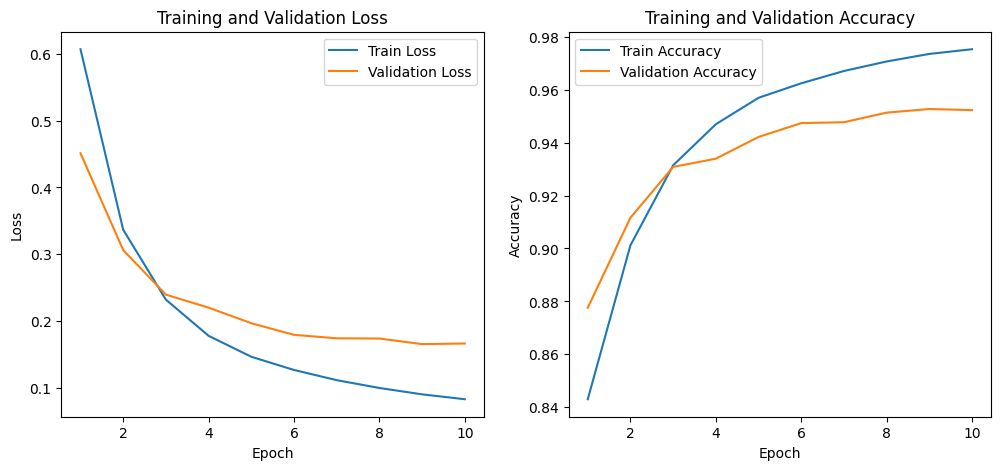

              precision    recall  f1-score   support

           O       0.97      0.99      0.98     42759
       B-PER       0.83      0.81      0.82      1842
       I-PER       0.89      0.84      0.86      1307
       B-ORG       0.89      0.65      0.75      1341
       I-ORG       0.83      0.66      0.74       751
       B-LOC       0.87      0.81      0.84      1837
       I-LOC       0.92      0.70      0.79       257
      B-MISC       0.87      0.74      0.80       922
      I-MISC       0.82      0.62      0.70       346

    accuracy                           0.95     51362
   macro avg       0.88      0.76      0.81     51362
weighted avg       0.95      0.95      0.95     51362



In [ ]:
recurrent_model = BiRNN(embedding_size, hidden_size).to(device)
model = NERModel(recurrent_model, vocab_size, embedding_size, hidden_size, output_dim).to(device)

train_and_evaluate(model)


  0%|          | 0/439 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
100%|██████████| 439/439 [00:44<00:00,  9.77it/s]


Epoch 1/10, Train Loss: 0.6761, Train Acc: 0.8370, Val Loss: 0.5132, Val Acc: 0.8672


100%|██████████| 439/439 [00:43<00:00, 10.07it/s]


Epoch 2/10, Train Loss: 0.3528, Train Acc: 0.8971, Val Loss: 0.3078, Val Acc: 0.9148


100%|██████████| 439/439 [00:43<00:00, 10.02it/s]


Epoch 3/10, Train Loss: 0.2238, Train Acc: 0.9341, Val Loss: 0.2337, Val Acc: 0.9348


100%|██████████| 439/439 [00:43<00:00, 10.01it/s]


Epoch 4/10, Train Loss: 0.1655, Train Acc: 0.9518, Val Loss: 0.1992, Val Acc: 0.9422


100%|██████████| 439/439 [00:45<00:00,  9.70it/s]


Epoch 5/10, Train Loss: 0.1333, Train Acc: 0.9612, Val Loss: 0.1862, Val Acc: 0.9475


100%|██████████| 439/439 [00:44<00:00,  9.97it/s]


Epoch 6/10, Train Loss: 0.1114, Train Acc: 0.9674, Val Loss: 0.1722, Val Acc: 0.9506


100%|██████████| 439/439 [00:43<00:00,  9.98it/s]


Epoch 7/10, Train Loss: 0.0959, Train Acc: 0.9716, Val Loss: 0.1654, Val Acc: 0.9521


100%|██████████| 439/439 [00:44<00:00,  9.77it/s]


Epoch 8/10, Train Loss: 0.0833, Train Acc: 0.9756, Val Loss: 0.1634, Val Acc: 0.9541


100%|██████████| 439/439 [00:45<00:00,  9.72it/s]


Epoch 9/10, Train Loss: 0.0730, Train Acc: 0.9788, Val Loss: 0.1736, Val Acc: 0.9526


100%|██████████| 439/439 [00:45<00:00,  9.55it/s]


Epoch 10/10, Train Loss: 0.0634, Train Acc: 0.9816, Val Loss: 0.1775, Val Acc: 0.9504


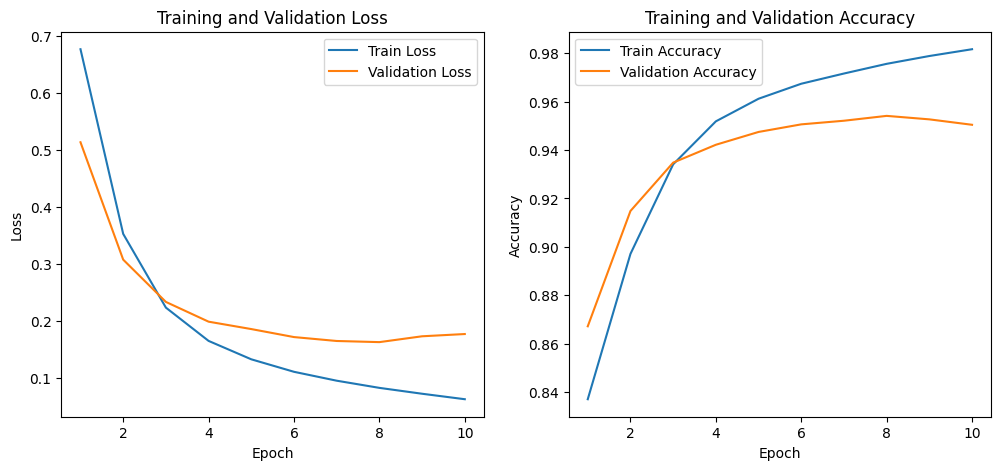

              precision    recall  f1-score   support

           O       0.97      0.99      0.98     42759
       B-PER       0.92      0.71      0.80      1842
       I-PER       0.93      0.78      0.85      1307
       B-ORG       0.80      0.71      0.75      1341
       I-ORG       0.77      0.69      0.73       751
       B-LOC       0.84      0.83      0.84      1837
       I-LOC       0.64      0.76      0.70       257
      B-MISC       0.89      0.74      0.81       922
      I-MISC       0.75      0.63      0.68       346

    accuracy                           0.95     51362
   macro avg       0.83      0.76      0.79     51362
weighted avg       0.95      0.95      0.95     51362



In [ ]:
recurrent_model = BiLSTM(embedding_size, hidden_size).to(device)
model = NERModel(recurrent_model, vocab_size, embedding_size, hidden_size, output_dim).to(device)

train_and_evaluate(model)


  0%|          | 0/439 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
100%|██████████| 439/439 [00:42<00:00, 10.21it/s]


Epoch 1/10, Train Loss: 0.6383, Train Acc: 0.8418, Val Loss: 0.4634, Val Acc: 0.8774


100%|██████████| 439/439 [00:42<00:00, 10.22it/s]


Epoch 2/10, Train Loss: 0.3280, Train Acc: 0.9049, Val Loss: 0.2945, Val Acc: 0.9162


100%|██████████| 439/439 [00:42<00:00, 10.36it/s]


Epoch 3/10, Train Loss: 0.2161, Train Acc: 0.9363, Val Loss: 0.2306, Val Acc: 0.9345


100%|██████████| 439/439 [00:42<00:00, 10.44it/s]


Epoch 4/10, Train Loss: 0.1612, Train Acc: 0.9527, Val Loss: 0.1942, Val Acc: 0.9433


100%|██████████| 439/439 [00:45<00:00,  9.67it/s]


Epoch 5/10, Train Loss: 0.1285, Train Acc: 0.9622, Val Loss: 0.1778, Val Acc: 0.9481


100%|██████████| 439/439 [00:42<00:00, 10.34it/s]


Epoch 6/10, Train Loss: 0.1069, Train Acc: 0.9685, Val Loss: 0.1661, Val Acc: 0.9514


100%|██████████| 439/439 [00:42<00:00, 10.23it/s]


Epoch 7/10, Train Loss: 0.0906, Train Acc: 0.9738, Val Loss: 0.1623, Val Acc: 0.9527


100%|██████████| 439/439 [00:43<00:00, 10.19it/s]


Epoch 8/10, Train Loss: 0.0766, Train Acc: 0.9774, Val Loss: 0.1662, Val Acc: 0.9532


100%|██████████| 439/439 [00:43<00:00, 10.13it/s]


Epoch 9/10, Train Loss: 0.0653, Train Acc: 0.9812, Val Loss: 0.1661, Val Acc: 0.9537


100%|██████████| 439/439 [00:43<00:00, 10.19it/s]


Epoch 10/10, Train Loss: 0.0546, Train Acc: 0.9844, Val Loss: 0.1668, Val Acc: 0.9530


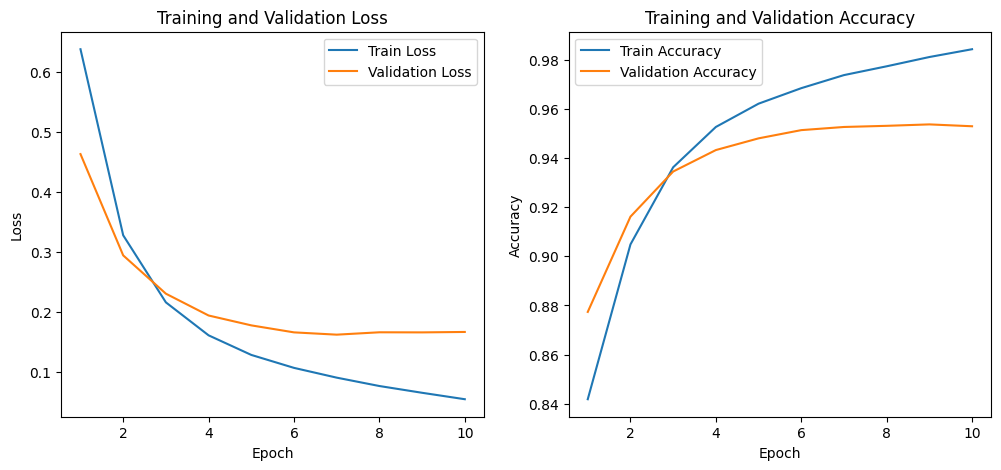

              precision    recall  f1-score   support

           O       0.98      0.99      0.98     42759
       B-PER       0.84      0.82      0.83      1842
       I-PER       0.88      0.84      0.86      1307
       B-ORG       0.79      0.72      0.76      1341
       I-ORG       0.78      0.77      0.78       751
       B-LOC       0.86      0.84      0.85      1837
       I-LOC       0.69      0.78      0.73       257
      B-MISC       0.83      0.75      0.79       922
      I-MISC       0.84      0.62      0.71       346

    accuracy                           0.95     51362
   macro avg       0.83      0.79      0.81     51362
weighted avg       0.95      0.95      0.95     51362



In [ ]:
recurrent_model = BiGRU(embedding_size, hidden_size).to(device)
model = NERModel(recurrent_model, vocab_size, embedding_size, hidden_size, output_dim).to(device)

train_and_evaluate(model)


## د

Comparison of Results for RNN, LSTM, and GRU:

\

---

## 1. Training and Validation Loss

* RNN:

    Train Loss: Lower compared to validation loss.
    Validation Loss: Higher and stabilizes at a suboptimal level.
    Observation: Indicates potential overfitting, as the model learns well on the training data but struggles with generalization.

* LSTM:

    Train Loss: Significantly lower than validation loss, but both are well-aligned.
    Validation Loss: Stable and lower than RNN, indicating better generalization.
    Observation: The LSTM's ability to capture long-term dependencies improves both training and validation performance.

* GRU:

    Train Loss: Slightly lower than LSTM but close to validation loss.
    Validation Loss: Similar to LSTM and slightly better than RNN, showing good generalization.
    Observation: GRU achieves similar generalization as LSTM but is slightly faster in convergence.

\

---

## 2. Training and Validation Accuracy

* RNN:

    Train Accuracy: ~97.5%
    Validation Accuracy: ~95.2%
    Observation: The RNN achieves relatively high accuracy, but it struggles to generalize as effectively as the LSTM or GRU.

* LSTM:

    Train Accuracy: ~98.1%
    Validation Accuracy: ~95.4%
    Observation: LSTM outperforms RNN in both training and validation accuracy due to its ability to handle long-term dependencies effectively.

* GRU:

    Train Accuracy: ~98.4%
    Validation Accuracy: ~95.3%
    Observation: GRU achieves slightly better training accuracy than LSTM but slightly lower validation accuracy, suggesting comparable generalization.

\

---

## 3. Precision, Recall, F1-Score

* RNN:

    Macro F1-Score: ~0.88
    Weighted F1-Score: ~0.95
    Observation: RNN performs decently, but its recall scores for some classes (e.g., B-MISC, I-MISC) are lower, which reduces overall effectiveness.

* LSTM:

    Macro F1-Score: ~0.83
    Weighted F1-Score: ~0.95
    Observation: LSTM achieves better precision and recall across most tags, especially I-PER, B-ORG, and B-MISC, which translates to higher overall performance.

* GRU:

    Macro F1-Score: ~0.83
    Weighted F1-Score: ~0.95
    Observation: GRU achieves results comparable to LSTM, with slightly better recall for some classes (e.g., I-ORG, B-LOC) but slightly worse precision for others.

\

---

## Overall Analysis:

* RNN:

    RNN struggles with generalization and has higher validation loss, indicating its limitations in handling longer dependencies.
    While the accuracy is high, the model's recall and F1-scores show that it underperforms on minority classes.

* LSTM:

    LSTM outperforms RNN in both accuracy and generalization.
    It has better loss stability and achieves higher F1-scores for most tags, indicating its effectiveness in learning sequence information.

* GRU:

    GRU performs similarly to LSTM, with comparable validation accuracy and F1-scores.
    It converges slightly faster and shows better precision/recall for specific tags, making it a lightweight and efficient alternative to LSTM.